In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.dummy import DummyClassifier
from textblob import TextBlob

In [3]:
df_final = pd.read_csv('./data/fire_frug_all.csv')

C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
df_final.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_patreon_flair,author_full,...,pwls,retr_on,score,stickied,subreddit,text,time,title,tot_awards,upvote_r
0,0,0,0,SMITBOMB,NaN,[],NaN,text,False,t2_3yxsd0ki,...,6,1643733499,1,False,Fire,"Lately, I’ve really been contemplating the pur...",1643733488,Do I really need to invest?,0,1.0
1,1,1,1,Riffington,NaN,[],NaN,text,False,t2_dyavg,...,6,1643730749,1,False,Fire,I can’t seem to find the step by step roadmap ...,1643730738,Savings planning roadmap,0,1.0


In [22]:
df_final['title']

0                              Do I really need to invest?
1                                 Savings planning roadmap
2               So when did you add 100% FI to your flair?
3                                       Quickest way to 1M
4        How on earth did some of you get such large Ro...
                               ...                        
38345               Do you only get 1 Honey offer per day?
38346    I’m tired of wasting cow milk - can someone he...
38347       Sources of Free / Cheap Scrap Graphite Blocks?
38348    Looking for a small, easily portable laptop fo...
38349    Does anyone know how to make a decent e-bike/e...
Name: title, Length: 38350, dtype: object

In [23]:
df_final['subreddit'].value_counts()

Fire      19700
Frugal    18650
Name: subreddit, dtype: int64

In [12]:
# prepare target

df_final['subreddit'] = df_final['subreddit'].map(lambda x: 1 if x=='Fire' else 0)


In [25]:
df_final['subreddit'].value_counts()

1    19700
0    18650
Name: subreddit, dtype: int64

In [85]:
#X = df_final['text']
X = df_final['fullpost']


In [84]:
df_final['fullpost']

0        Do I really need to invest? Lately, I’ve reall...
1        Savings planning roadmap I can’t seem to find ...
2        So when did you add 100% FI to your flair? Not...
3        Quickest way to 1M I’m currently 20 years old ...
4        How on earth did some of you get such large Ro...
                               ...                        
38345    Do you only get 1 Honey offer per day? I purch...
38346    I’m tired of wasting cow milk - can someone he...
38347    Sources of Free / Cheap Scrap Graphite Blocks?...
38348    Looking for a small, easily portable laptop fo...
38349    Does anyone know how to make a decent e-bike/e...
Name: fullpost, Length: 38350, dtype: object

In [83]:
df_final['fullpost']= df_final['title'] + ' ' + df_final['text']



In [27]:
y = df_final['subreddit']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=133)

In [87]:
vect = CountVectorizer(stop_words='english')

In [88]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<28762x7800 sparse matrix of type '<class 'numpy.int64'>'
	with 1394464 stored elements in Compressed Sparse Row format>

In [89]:
X_train_dtm.shape

(28762, 7800)

In [90]:
X_test_dtm = vect.transform(X_test)

In [91]:
lr = LogisticRegression(max_iter=10_000)
lr.fit(X_train_dtm, y_train)

LogisticRegression(max_iter=10000)

In [92]:
lr.score(X_test_dtm, y_test)

1.0

In [93]:
lr.score(X_train_dtm, y_train)

1.0

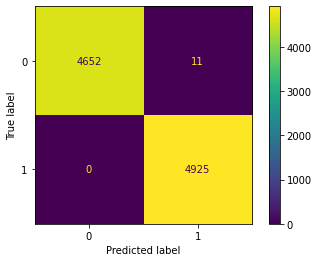

In [71]:
ConfusionMatrixDisplay.from_estimator(lr, X_test_dtm, y_test);

In [94]:
vocab = vect.get_feature_names_out()
vocab

array(['00', '000', '000k', ..., 'করল', 'মন', 'হচ'], dtype=object)

In [95]:
outp = pd.DataFrame(X_train_dtm.A, columns=vocab)
outp

,00,000,000k,006,01,015,02,03,035,05,...,zestimate,zing,zone,zoom,zoos,équation,করব,করল,মন,হচ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28760,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
outp.sum().sort_values(ascending=False)[:20]

#top 20 words for both subreddits    

just      15061
like      13151
money     13013
years     12775
year      12647
don       10961
want       9616
time       9380
work       9189
ve         9002
job        8324
know       7773
000        7621
buy        7150
need       6898
good       6818
people     6635
make       6458
new        6369
income     6363
dtype: int64

In [106]:

coef = {'feature': vect.get_feature_names_out(), 
        'coef': lr.coef_}



In [113]:
var_coef = pd.DataFrame(lr.coef_).T.set_index(vect.get_feature_names_out())
#look at end of Logistic Regression Lab
np.exp(var_coef[0][0])
#over 1 is more likely to be in the positive class 13 times as likely

0.882908221949905

In [125]:
var_coef

,0
00,-1.245340e-01
000,5.044237e-01
000k,5.012158e-05
006,9.178650e-05
01,5.358122e-06
...,...
équation,4.127105e-07
করব,-1.051079e-01
করল,-1.051079e-01
মন,-1.051079e-01


In [128]:
trans_var_coef = np.exp(var_coef)

In [129]:
trans_var_coef.head(2)


,0
00,0.882908
000,1.656031


In [130]:
trans_var_coef.sort_values(by=0, ascending=False)[:20]
#top 20 words of importance indicating fire subreddit

,0
dreaming,38.637302
big,19.947315
life,18.127945
etfs,17.050333
stocks,16.146263
passive,12.918962
300,7.521681
fi,6.781990
portfolio,5.867585
trying,5.627272


In [132]:
trans_var_coef.sort_values(by=0, ascending=False)[-20:]
#bottom 20 words of importance indicating frugal subreddit

,0
save,0.389130
dont,0.387847
paper,0.383254
phone,0.374670
does,0.370862
replacing,0.358584
survey,0.356170
car,0.343888
items,0.336802
tried,0.330797


In [127]:
var_coef.sort_values(by=0, ascending=False)[:20]

,0
dreaming,3.654218
big,2.993095
life,2.897455
etfs,2.836170
stocks,2.781689
passive,2.558696
300,2.017790
fi,1.914271
portfolio,1.769443
trying,1.727625


Calculate model null accuracy.

In [76]:
y_test.value_counts(normalize=True)

1    0.513663
0    0.486337
Name: subreddit, dtype: float64

In [77]:
null_model = DummyClassifier()
null_model.fit(X_train_dtm, y_train)
balanced_accuracy_score(y_test, null_model.predict(X_test_dtm))

0.5

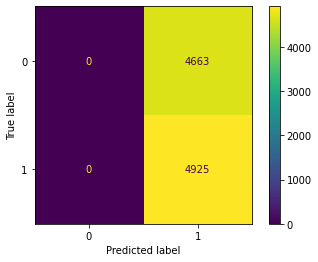

In [78]:
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    null_model.predict(X_test_dtm));

#We see that the null model is predicting all posts are Fire so it only has a 50% accuracy rate    

In [79]:
balanced_accuracy_score(y_test, lr.predict(X_test_dtm))

0.9988205018228609

In [4]:
def detect_sentiment(text):
    '''Accepts text and returns the polarity'''
    
    return TextBlob(text).sentiment[0]


In [6]:
df_final['title_polr'] = df_final['title'].apply(detect_sentiment)
df_final['text_polr'] = df_final['text'].apply(detect_sentiment)

In [7]:
df_final.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_patreon_flair,author_full,...,score,stickied,subreddit,text,time,title,tot_awards,upvote_r,title_polr,text_polr
0,0,0,0,SMITBOMB,NaN,[],NaN,text,False,t2_3yxsd0ki,...,1,False,Fire,"Lately, I’ve really been contemplating the pur...",1643733488,Do I really need to invest?,0,1.0,0.2,0.039219
1,1,1,1,Riffington,NaN,[],NaN,text,False,t2_dyavg,...,1,False,Fire,I can’t seem to find the step by step roadmap ...,1643730738,Savings planning roadmap,0,1.0,0.0,0.025000


In [8]:
df_final.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,num_comments,num_cross,pwls,retr_on,score,time,tot_awards,upvote_r,title_polr,text_polr
count,38350.000000,38350.000000,38350.000000,38350.000000,38350.0,38350.0,3.835000e+04,38350.000000,3.835000e+04,38350.0,38350.000000,38350.000000,38350.000000
mean,9594.187093,2174.304433,2497.088005,0.005215,0.0,6.0,1.642985e+09,1.000000,1.642985e+09,0.0,0.999322,0.094830,0.098392
std,5547.847818,1303.916077,1442.155505,0.072028,0.0,0.0,4.211218e+05,0.051065,4.211218e+05,0.0,0.018049,0.240713,0.159514
min,0.000000,0.000000,0.000000,0.000000,0.0,6.0,1.642228e+09,0.000000,1.642228e+09,0.0,0.500000,-0.750000,-0.625000
25%,4793.250000,1065.000000,1247.000000,0.000000,0.0,6.0,1.642622e+09,1.000000,1.642622e+09,0.0,1.000000,0.000000,0.000000
50%,9587.000000,2130.000000,2498.000000,0.000000,0.0,6.0,1.642977e+09,1.000000,1.642977e+09,0.0,1.000000,0.000000,0.077273
75%,14380.750000,3195.000000,3745.000000,0.000000,0.0,6.0,1.643338e+09,1.000000,1.643338e+09,0.0,1.000000,0.165909,0.168669
max,19699.000000,4949.000000,4999.000000,1.000000,0.0,6.0,1.643733e+09,2.000000,1.643733e+09,0.0,1.000000,1.000000,1.000000


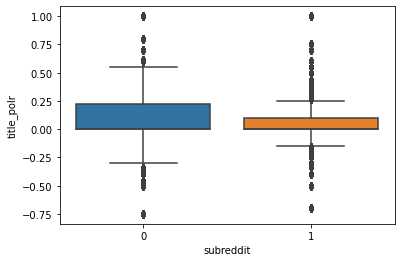

In [17]:
sns.boxplot(data=df_final, y='title_polr',x='subreddit');


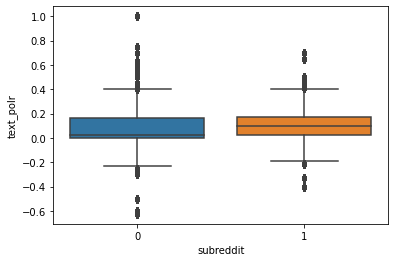

In [18]:
sns.boxplot(data=df_final, y='text_polr',x='subreddit');